In [1]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

1


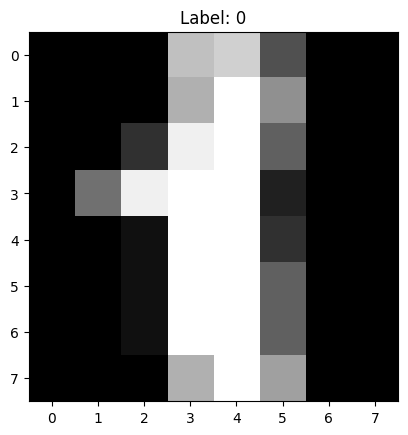

In [6]:
import matplotlib.pyplot as plt

print(y[1])
plt.imshow(X[1].reshape(8, 8), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [11]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy: {accuracy_poly:.2f}")

Polynomial Kernel Accuracy: 0.96


In [12]:
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")

RBF Kernel Accuracy: 0.98


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [16]:
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'},
 np.float64(0.9867813588850174))